In [1]:
import matplotlib.pyplot as plt, numpy as np, pickle, os

In [2]:
results_path, experiment_no = os.getcwd()+'/Results', 11

In [3]:
with (open(os.path.join(results_path, f'{experiment_no}. Metadata.meta'), 'rb')) as open_file:
    while True:
        try:
            meta = pickle.load(open_file)
            print(f'Runs: {meta["runs"]}\nBin size: {meta["bin_size"]}')
        except EOFError:
            break
open_file.close()

Runs: 5
Bin size: 10


In [4]:
with (open(os.path.join(results_path, f'{experiment_no}. Parameters.pth'), 'rb')) as open_file:
    while True:
        try:
            parameters = pickle.load(open_file)
            print(f'Epochs: {parameters["n_epochs"]}\nReps: {parameters["n_reps_per_epoch"]}\nNetwork: {parameters["network"]}\nTrains: {parameters["n_trains"]}\nLearning Rate: {parameters["learning_rate"]}\nMin Epsilon: {parameters["min_epsilon"]}\nEpsilon Decay Factor: {parameters["epsilon_decay_factor"]}\nSGD: {parameters["use_SGD"]}')
        except EOFError:
            break
open_file.close()

Epochs: 50
Reps: 50
Network: [50, 50]
Trains: 25
Learning Rate: 0.001
Min Epsilon: 0.05
Epsilon Decay Factor: 0.92
SGD: True


In [5]:
Qnets, outputs = [], []
for i in range(meta['runs']):
    with (open(os.path.join(results_path, f'{experiment_no}. Qnet - Run {i+1}.pt'), 'rb')) as open_file:
        while True:
            try:
                Qnet = pickle.load(open_file)
                Qnets.append(Qnet)
            except EOFError:
                break
    open_file.close()
    with (open(os.path.join(results_path, f'{experiment_no}. Outputs - Run {i+1}.pth'), 'rb')) as open_file:
        while True:
            try:
                output = pickle.load(open_file)
                outputs.append(output)
            except EOFError:
                break
    open_file.close()

In [6]:
def plot_results(win_rate, bin_size):
    plt.figure(figsize=(12, 9))
    plt.gca().set(title=f'Highest win rate during training: {np.max(win_rate)}\nWin rate at training end: {win_rate[-1]}', xlabel='Epoch', ylabel='Averaged Win %', ylim=(50, 100)) # Set standard range for y
    plt.plot(range(bin_size, bin_size+len(win_rate)), win_rate)
    return

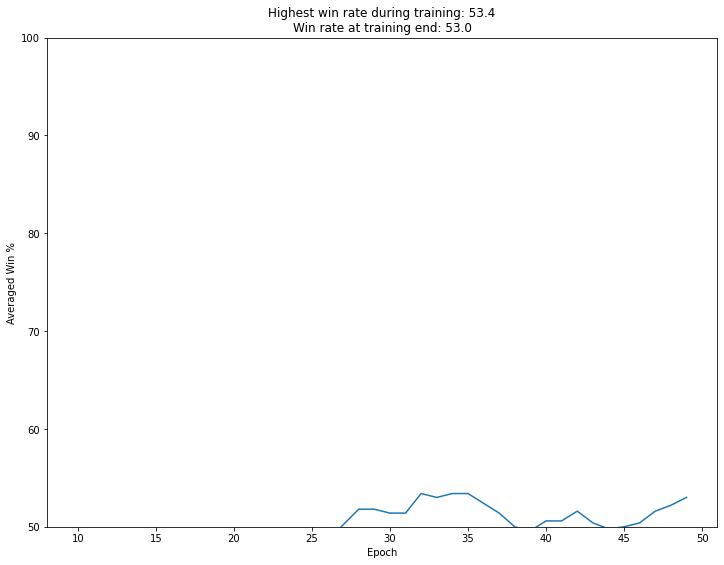

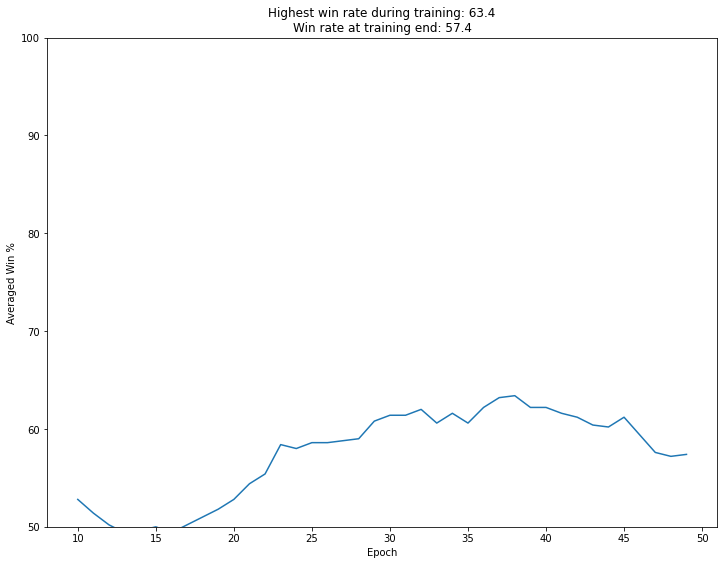

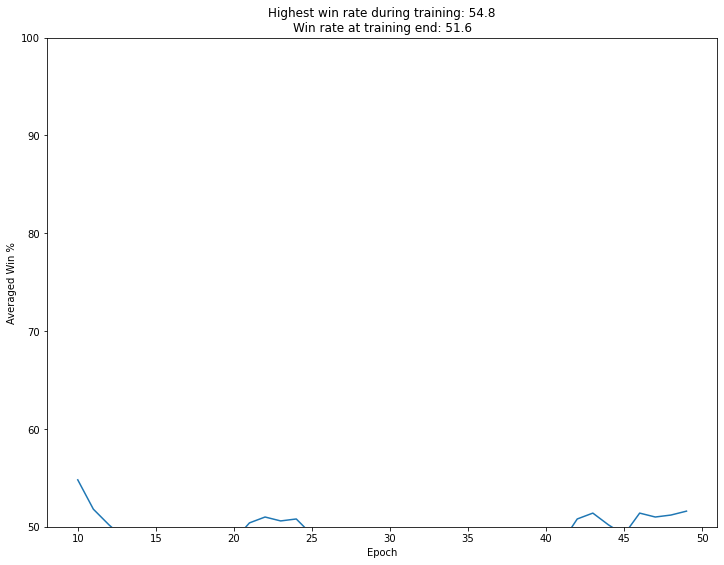

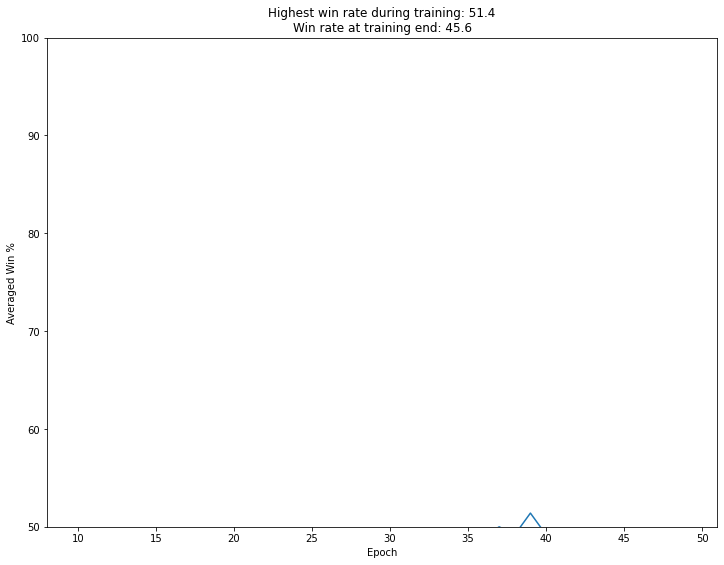

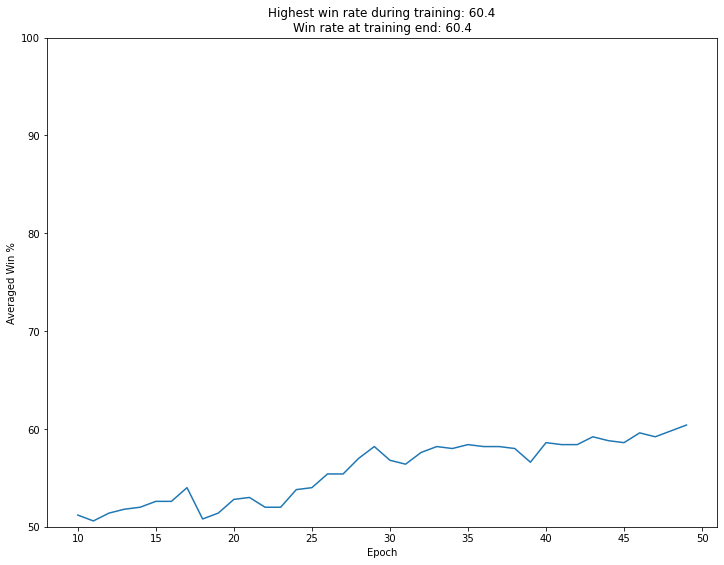

In [7]:
for output in outputs:
    plot_results(output['win_rate'], meta['bin_size'])

In [8]:
def plot_wins(win_rates, bin_size):
    plt.figure(figsize=(12, 9))
    plt.gca().set(title='Wins', xlabel='Epoch', ylabel='Win % Range', ylim=(50, 100)) # Set standard range for y
    plt.plot(range(bin_size, bin_size+win_rates.shape[1]), np.mean(win_rates, axis=0)) # Plotting win rate averaged over 5 runs
    plt.fill_between(range(bin_size, bin_size+win_rates.shape[1]), np.min(win_rates, axis=0), np.max(win_rates, axis=0), color='orange', alpha=0.3) # Plotting minimum and maximum values for individual runs
    return

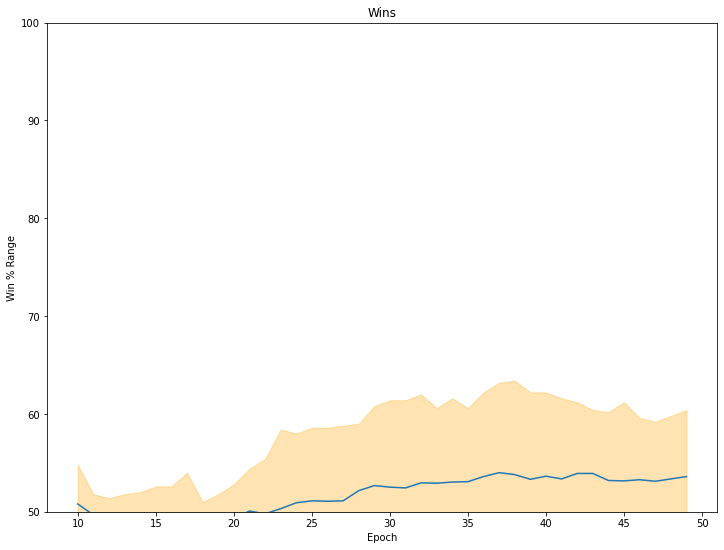

In [9]:
plot_wins(np.array([output['win_rate'] for output in outputs]).reshape(meta['runs'], -1), meta['bin_size'])

In [10]:
Qnets[0].state_dict()

OrderedDict([('model.0.weight',
              tensor([[ 0.1226, -0.1034, -0.1454,  ..., -0.1114,  0.0330, -0.0944],
                      [ 0.0845,  0.0032,  0.1461,  ..., -0.0974, -0.0364, -0.0605],
                      [ 0.1071, -0.0952, -0.1295,  ...,  0.0908,  0.0616,  0.0219],
                      ...,
                      [ 0.1387,  0.0942, -0.0757,  ...,  0.0519, -0.0972,  0.1015],
                      [ 0.0116,  0.0966, -0.0197,  ...,  0.1397, -0.0369, -0.1442],
                      [ 0.0162, -0.0898,  0.0210,  ...,  0.0214, -0.0206, -0.1377]],
                     device='cuda:0', dtype=torch.float64)),
             ('model.0.bias',
              tensor([-0.0066,  0.0220,  0.1200,  0.0376,  0.0339,  0.0272, -0.0690, -0.0231,
                       0.0358, -0.0134,  0.1362,  0.0222,  0.0702,  0.0274, -0.1402,  0.0616,
                       0.0190, -0.0496, -0.0008,  0.0469,  0.0115, -0.0886, -0.1295, -0.0737,
                      -0.0996,  0.0640,  0.0379,  0.0177,  0.04

In [11]:
Qnets[0].state_dict()['model.0.weight'].detach().cpu().numpy()[0]

array([ 0.12260304, -0.10339321, -0.1453562 ,  0.02429878, -0.11432251,
       -0.00790848, -0.0759309 ,  0.12171683,  0.08972161, -0.07467683,
       -0.13022013, -0.07462945, -0.10468071, -0.06118296, -0.0579705 ,
       -0.01778533, -0.02190046, -0.02438658, -0.14550388, -0.0053367 ,
        0.06863063,  0.04948049,  0.04938667, -0.05696075, -0.03298358,
        0.06185917, -0.13274261, -0.06188445,  0.08047956, -0.0661495 ,
       -0.00891049, -0.0405129 ,  0.11350291, -0.12438805, -0.14327908,
       -0.07782509,  0.05391095, -0.04309713,  0.05345635,  0.09230599,
        0.09485117, -0.07745148, -0.04796529, -0.1325144 ,  0.1166958 ,
       -0.1114257 ,  0.03298702, -0.09440095])